# Import Statements

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


# Create Numpy Array

In [3]:
fname = 'RML2016.10a_dict.pkl'
f = open(fname,'rb')
input_data_dict = pickle.load(f, encoding='latin1')

"""
Data size is 1000*2*128
Consider it as 1000 images of size 1*2*128. Where 1 is the color channel.
We need the data in this format:

image - mod - snr
image - mod - snr
image - mod - snr

Create 3 arrays:
image, mod, snr
"""

input_data_dict_keys = sorted(input_data_dict.keys())

modulation_types    = [input_data_dict_keys[i*20][0] for i in range(0,11)]
snr_types           = [input_data_dict_keys[i][1] for i in range(0,20)]

print(modulation_types)
print(snr_types)

"""
image = []
modulation = []
snr = []

print(np.shape(image), np.shape(modulation), np.shape(snr))

for m_cnt,m in enumerate(modulation_types,0):
    for s in snr_types:
        print(m,str(s))
        image.extend(input_data_dict[(m,s)])
        modulation.extend([m_cnt for _ in range(0,1000)])
        snr.extend([s for _ in range(0,1000)])
        
print(np.shape(image), np.shape(modulation), np.shape(snr))
image = np.array(image)
modulation = np.array(modulation)
snr = np.array(snr)
"""

image = np.zeros((220000,2,128), dtype='float32')
modulation = np.zeros((220000), dtype='int32')
snr = np.zeros((220000), dtype='int32')
cnt = 0

for m_cnt,m in enumerate(modulation_types,0):
    for s in snr_types:
        print(m,str(s))
        image[cnt:cnt+1000,:,:] = np.array(input_data_dict[(m,s)])
        modulation[cnt:cnt+1000] = np.array([m_cnt for _ in range(0,1000)])
        snr[cnt:cnt+1000] = np.array([s for _ in range(0,1000)])
        #print(np.shape(image), np.shape(modulation), np.shape(snr))
        cnt += 1000

idx = 20000
print(image[idx], modulation[idx], snr[idx])
print(input_data_dict[('8PSK',-20)])

['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
8PSK -20
8PSK -18
8PSK -16
8PSK -14
8PSK -12
8PSK -10
8PSK -8
8PSK -6
8PSK -4
8PSK -2
8PSK 0
8PSK 2
8PSK 4
8PSK 6
8PSK 8
8PSK 10
8PSK 12
8PSK 14
8PSK 16
8PSK 18
AM-DSB -20
AM-DSB -18
AM-DSB -16
AM-DSB -14
AM-DSB -12
AM-DSB -10
AM-DSB -8
AM-DSB -6
AM-DSB -4
AM-DSB -2
AM-DSB 0
AM-DSB 2
AM-DSB 4
AM-DSB 6
AM-DSB 8
AM-DSB 10
AM-DSB 12
AM-DSB 14
AM-DSB 16
AM-DSB 18
AM-SSB -20
AM-SSB -18
AM-SSB -16
AM-SSB -14
AM-SSB -12
AM-SSB -10
AM-SSB -8
AM-SSB -6
AM-SSB -4
AM-SSB -2
AM-SSB 0
AM-SSB 2
AM-SSB 4
AM-SSB 6
AM-SSB 8
AM-SSB 10
AM-SSB 12
AM-SSB 14
AM-SSB 16
AM-SSB 18
BPSK -20
BPSK -18
BPSK -16
BPSK -14
BPSK -12
BPSK -10
BPSK -8
BPSK -6
BPSK -4
BPSK -2
BPSK 0
BPSK 2
BPSK 4
BPSK 6
BPSK 8
BPSK 10
BPSK 12
BPSK 14
BPSK 16
BPSK 18
CPFSK -20
CPFSK -18
CPFSK -16
CPFSK -14
CPFSK -12
CPFSK -10
CPFSK -8
CPFSK -6
CPFSK -4
CPFSK -2
CP

# Visualize Data

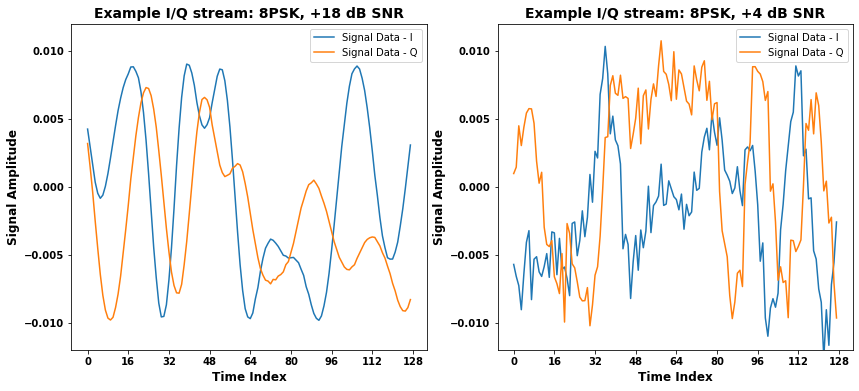

In [4]:
# Plot example I/Q timeseries
plt.figure(figsize=(14,6))

# Plot data 0 (out of range 0:999) of 8PSK, SNR +18
i_data = input_data_dict[('8PSK',18)][0][0]
q_data = input_data_dict[('8PSK',18)][0][1]

#### Fill in plot #####
plt.subplot(121)
plt.title('Example I/Q stream: 8PSK, +18 dB SNR', fontweight='bold', fontsize=14);
plt.plot(range(0,128), i_data, range(0,128), q_data);
plt.xlabel('Time Index', fontsize=12, fontweight='bold');
plt.xticks(np.arange(0, 129, step=16), fontweight='bold', fontsize=10);
plt.ylabel('Signal Amplitude', fontsize=12, fontweight='bold');
plt.yticks(fontweight='bold', fontsize=10);
plt.legend(('Signal Data - I','Signal Data - Q'), fontsize=10, loc=1);
plt.ylim(-.012, .012);

# Plot data 0 (out of range 0:999) of 8PSK, SNR +4
i_data = input_data_dict[('8PSK',4)][0][0]
q_data = input_data_dict[('8PSK',4)][0][1]

#### Fill in plot #####
plt.subplot(122)
plt.title('Example I/Q stream: 8PSK, +4 dB SNR', fontweight='bold', fontsize=14);
plt.plot(range(0,128), i_data, range(0,128), q_data);
plt.xlabel('Time Index', fontsize=12, fontweight='bold');
plt.xticks(np.arange(0, 129, step=16), fontweight='bold', fontsize=10);
plt.ylabel('Signal Amplitude', fontsize=12, fontweight='bold');
plt.yticks(fontweight='bold', fontsize=10);
plt.legend(('Signal Data - I','Signal Data - Q'), fontsize=10, loc=1);
plt.ylim(-.012, .012);
plt.show();

# Create Composite Dataset

In [5]:
dataset = [image, modulation, snr]

# Custom Dataset Class

In [6]:
class myDataset(torch.utils.data.Dataset):
    def __init__(self, dataset_list):
        self.dataset_list = dataset_list
        self.image = dataset_list[0]
        self.modulation = dataset_list[1]
        self.snr = dataset_list[2]
        
    def __len__(self):
        return len(self.dataset_list)
    def __getitem__(self, idx):
        return torch.unsqueeze(torch.from_numpy(self.image[idx]),dim=0), torch.tensor(self.modulation[idx]), torch.tensor(self.snr[idx])
        

# Test-Train split & Dataloader

In [7]:
transformed_dataset = myDataset(dataset)

# @KK: I changed len(dataset) to len(dataset[0]) because otherwise "l" was just [0, 1, 2] - PM
l = list(range(0, len(dataset[0])))
np.random.shuffle(l)
train_indices, test_indices = l[:int(0.8*len(dataset[0]))],l[int(0.8*len(dataset[0])):]

train_sampler=torch.utils.data.SubsetRandomSampler(train_indices)
test_sampler=torch.utils.data.SubsetRandomSampler(test_indices)

train_dataloader = torch.utils.data.DataLoader(transformed_dataset, batch_size=64, shuffle=False, num_workers=2, sampler=train_sampler, pin_memory=True)
test_dataloader = torch.utils.data.DataLoader(transformed_dataset, batch_size=64, shuffle=False, num_workers=2, sampler=test_sampler, pin_memory=True)

# Example of how to use it

In [8]:
print(type(dataset[2][20000]))
for i, data in enumerate(train_dataloader):
    input_data, modulation, snr = data
    print(input_data.size(), modulation.size(), snr.size())
    break # If you remove the break this will iterate through the entire training set

<class 'numpy.int32'>
torch.Size([64, 1, 2, 128]) torch.Size([64]) torch.Size([64])


# Create CNN Model

In [9]:
class ModulationClassifer(nn.Module):
    def __init__(self, num_classes=11):
        super(ModulationClassifer, self).__init__()
        
        # Treating input as 2x128 image with 1 channel (depth 1)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=256, kernel_size=1, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=1, out_channels=80, kernel_size=2, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.fc1   = nn.Linear(in_features=1 * 127 * 80, out_features=256)
        self.relu3 = nn.ReLU()
        self.fc2   = nn.Linear(in_features=256, out_features=num_classes)
        self.smx   = nn.Softmax(dim=1)

    def forward(self, input):
#         print(input.size())
        output = self.conv1(input)
#         print(output.size())
        output = self.relu1(output)
#         print(output.size())
        output = self.conv2(input)
#         print(output.size())
        output = self.relu2(output)
#         print(output.size())
        output = output.view(-1, 1 * 127 * 80)
#         print(output.size())
        output = self.fc1(output)
#         print(output.size())
        output = self.relu3(output)
#         print(output.size())
        output = self.fc2(output)
#         print(output.size())
        output = self.smx(output)
#         print(output.size())

        return output
    
modulation_classifier = ModulationClassifer()
modulation_classifier.to(device);     # Use GPU if available

# Define Loss Function & Optimizer

In [10]:
# learning_rate = 0.0001
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modulation_classifier.parameters(), lr=learning_rate)

# Train Network

In [11]:
num_epochs = 10
epoch_loss_array = np.zeros(num_epochs)

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    epoch_loss = 0.0
    
    for i, data in enumerate(train_dataloader):
        # get the input_data, modulation type (labels), and SNR
        input_data, modulation, snr = data
        
        # Use GPU if possible (convert to cuda tensor)
        input_data = input_data.to(device);
        modulation = modulation.to(device);
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = modulation_classifier(input_data)   # Run batch
#         print(outputs)
        loss = criterion(outputs, modulation.long())  # Wants indexes for labels, *not* one-hot encodings.
        loss.backward()                               # Compute backprop
        optimizer.step()                              # Move a step in the right direction

        # print statistics
        epoch_loss += outputs.shape[0] * loss.item()
        running_loss += loss.item()
        
#         if i % 500 == 499:    # print every 500 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0
#         break
    
    # print epoch loss
    epoch_loss_array[epoch] = epoch_loss / int(0.8*len(dataset[0]))
    print(epoch+1, epoch_loss_array[epoch])

print('Finished Training')

1 2.3981752544749866
2 2.397904693170027
3 2.397906111457131
4 2.397905017072504
5 2.397904370654713
6 2.397905351292003
7 2.397905312278054
8 2.397904335888949
9 2.3979041685624556
10 2.397904814980247
Finished Training


# Plot Loss vs Epoch

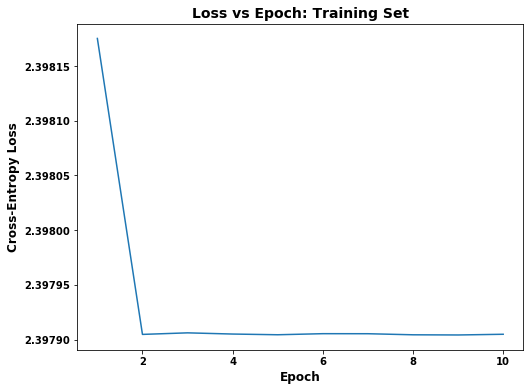

In [15]:
# Plot loss vs epoch
plt.figure(figsize=(8,6))

plt.title('Loss vs Epoch: Training Set', fontweight='bold', fontsize=14);
plt.plot(range(1,num_epochs+1), epoch_loss_array);
plt.xlabel('Epoch', fontsize=12, fontweight='bold');
plt.xticks(fontweight='bold', fontsize=10);
plt.ylabel('Cross-Entropy Loss', fontsize=12, fontweight='bold');
plt.yticks(fontweight='bold', fontsize=10);
# plt.legend(('Model Loss - Training Set'), fontsize=10, loc=1);

plt.show();

# Evaluate Model on Test Set...